In [2]:
from manim import *
from classes.electrodynamics_classes import *
import jupyter_capture_output

video_scene = " -v WARNING --disable_caching dirac_Scene"
image_scene = f" -v WARNING --disable_caching -r {2*427},{2*240}  -s dirac_Scene"

Manim Community v0.18.0.post0

Jupyter Capture Output v0.0.11


In [80]:
main_color = BLACK
inverted_main_color = WHITE
red_color = PURE_RED
blue_color = PURE_BLUE
grey_color = DARK_GREY

In [33]:
def GetGaussFunc(a):
    def Gaussian(x):
        return 1 / np.sqrt(np.pi) / a * np.exp(-x**2 / a**2)
    return Gaussian

In [78]:
class DeltaPlot(Mobject):
    def __init__(self, position = np.array([0, 0, 0]), height = 4, width = 3, rev_a = 1, **kwargs):
        super().__init__(**kwargs)
        self.center = position
        self.ax_height = height
        self.ax_width = width
        self.a = 1 / rev_a

        y_max = 5
        y_min = -0.5

        x_minmax = 2

        # coordinate system
        self.tube_ax = Axes(x_range = [-x_minmax, x_minmax], y_range = [y_min, y_max], x_length = self.ax_width, y_length = self.ax_height,
            axis_config = {"stroke_width": 2, "stroke_opacity": 1, "tip_width": 0.125, "tip_height": 0.125, "stroke_color": main_color, "include_ticks": True}).move_to(self.center)
        self.add(self.tube_ax)

        self.gauss_plot = self.tube_ax.plot(GetGaussFunc(self.a), color = blue_color, x_range = [-x_minmax, x_minmax], stroke_opacity = 1)
        self.add(self.gauss_plot)

Output saved by creating file at animations/delta_distribution/dirac_delta.mp4.


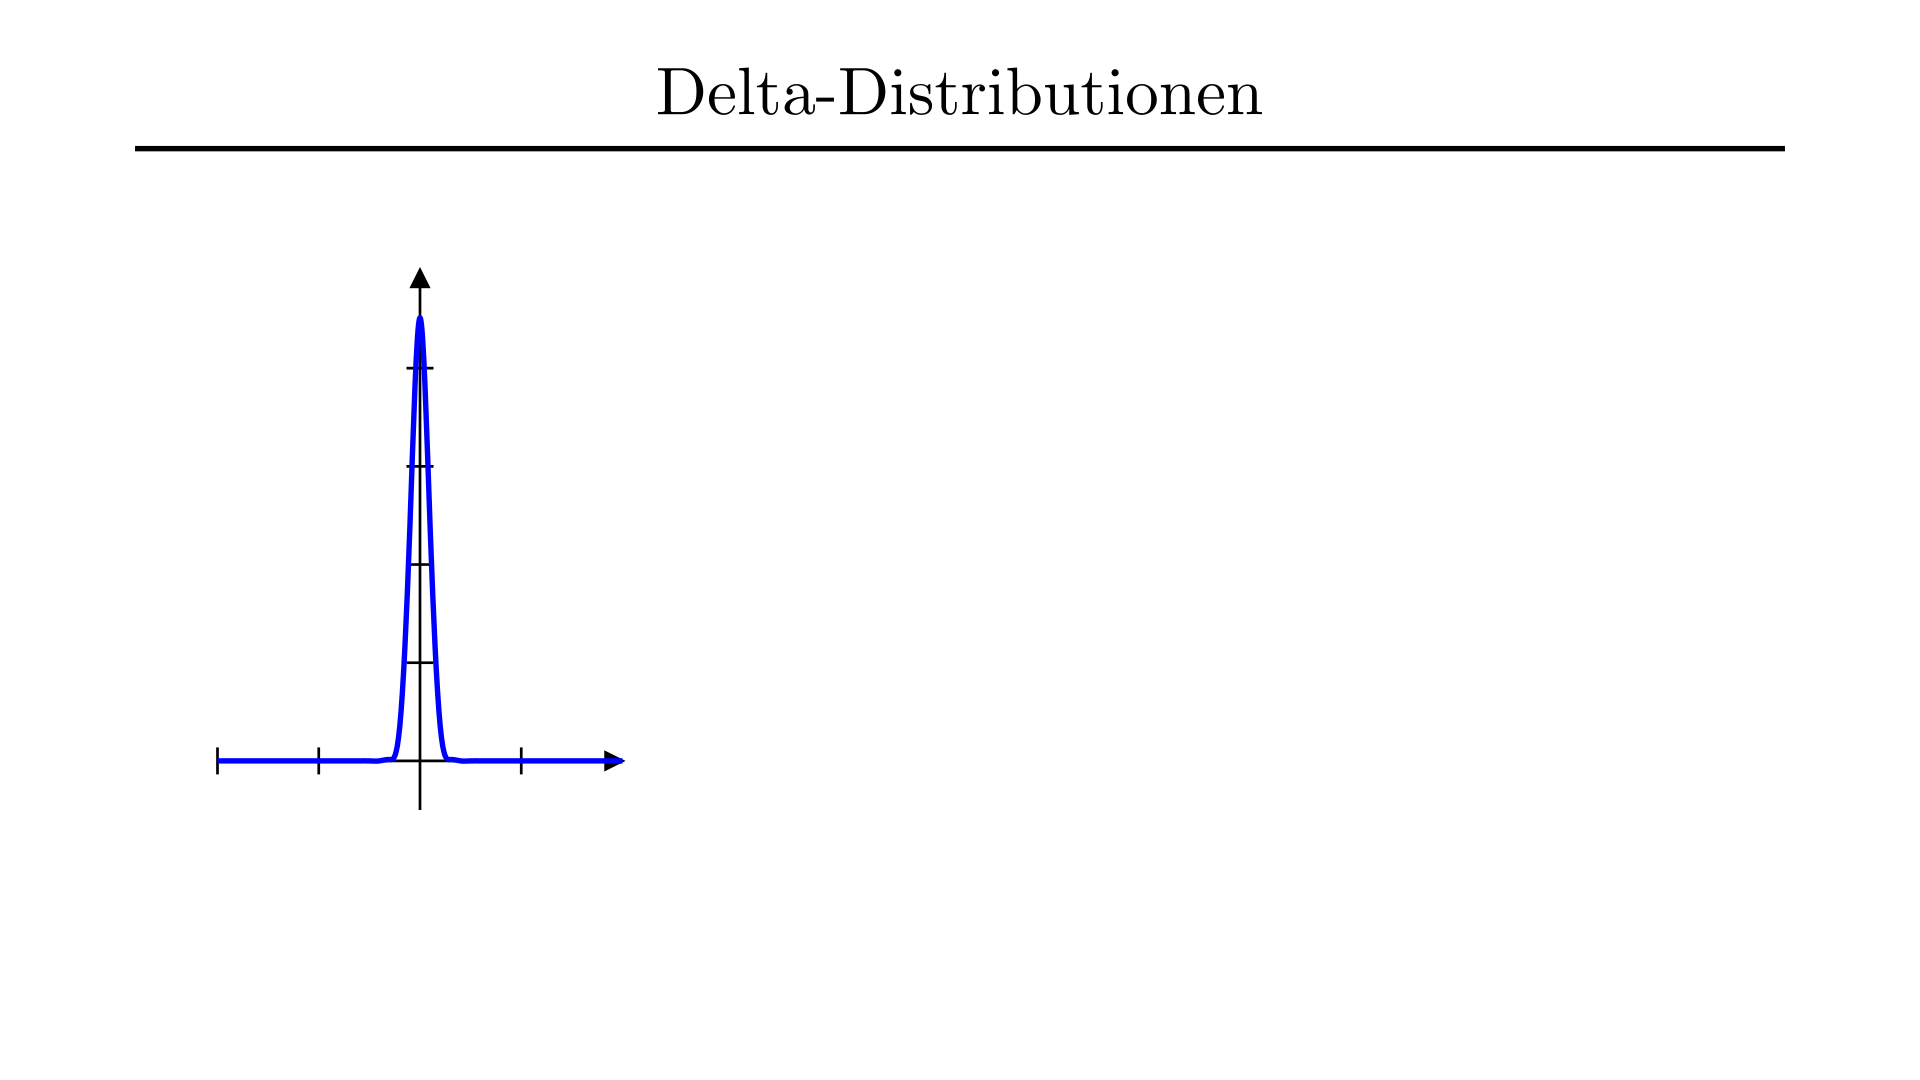

In [85]:
%%capture_video --path "animations/delta_distribution/dirac_delta.mp4"
%%manim -qh --fps 60 $video_scene


class dirac_Scene(Scene):
    def construct(self):
        self.camera.background_color = inverted_main_color

        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)

        # headline
        headline = Title(r"Delta-Distributionen", font_size = 48, color = inverted_main_color).align_on_border(UP + LEFT, buff = 0.5).shift(0.5 * RIGHT).set_color(main_color)

        self.add(headline)

        delta_plot = DeltaPlot(position = np.array([-4, 0, 0]), rev_a = 8)
        self.add(delta_plot)